# Index Tracking and Forward Testing (US Stocks)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
import pandas as pd

In [28]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

## Importing the Data

In [11]:
const = pd.read_csv(r"C:\Users\CPL17\OneDrive\Documents\Data\const_prices.csv",parse_dates = ["Date"],index_col="Date")

In [19]:
dji = pd.read_csv(r"C:\Users\CPL17\OneDrive\Documents\Data\dji.csv",parse_dates = ["Date"],index_col = "Date")
close = dji.Close.to_frame().copy()

In [24]:
df = pd.concat([const, close], axis = 1)
df.rename(columns = {"Close": "DJI"}, inplace = True)

In [25]:
df.head(2)

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,11.971429,60.360001,89.169998,61.16,27.730000,70.970001,33.738300,NaN,200.720001,41.07,...,64.540001,39.528004,53.549999,52.57,NaN,35.306732,46.07,47.549999,74.110001,12474.519531
2007-01-04,12.237143,59.919998,89.529999,61.00,28.459999,70.279999,34.004654,NaN,198.850006,40.57,...,64.050003,39.565765,53.099998,52.91,NaN,35.502777,46.16,47.779999,72.720001,12480.690430


In [18]:
more_info = pd.read_csv("const.csv")

In [ ]:
more_info.head(2)

,Company,Exchange,Symbol,Industry,Date_Added,Ticker
0,3M,NYSE,NYSE: MMM,Conglomerate,1976-08-09,MMM
1,American Express,NYSE,NYSE: AXP,Financial services,1982-08-30,AXP


## Transforming the Data

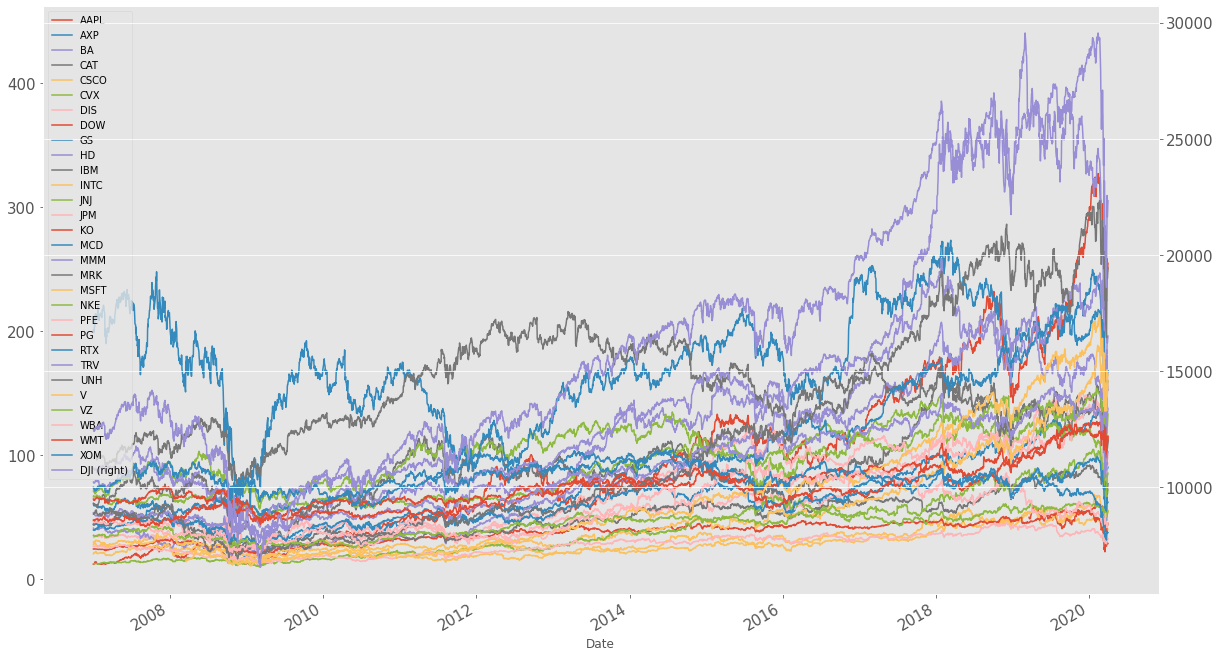

In [27]:
df.plot(figsize = (20, 12), fontsize = 15, secondary_y = "DJI")
plt.show()

In [26]:
#Normalize the data 

norm = df.div(df.iloc[0]).mul(100) 
norm.head(2)

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,NaN,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.0000,100.000000,100.000000
2007-01-04,102.219565,99.271036,100.403724,99.738391,102.632526,99.027755,100.78947,NaN,99.068356,98.782566,...,99.240784,100.095531,99.159662,100.646757,NaN,100.555262,100.195355,100.4837,98.124411,100.049468


In [30]:
# Calculate returns 
ret = df.pct_change()

### Create a df that summarizes risk/return of the companies on DJI

In [33]:
summary = summary_ann(ret)
summary.head()

,Return,Risk
AAPL,0.283326,0.322011
AXP,0.101747,0.378787
BA,0.094477,0.327538
CAT,0.099013,0.327003
CSCO,0.072630,0.297358


In [38]:
summary = summary.merge(more_info.loc[:, ["Symbol", "Company"]],
                        how = "left", left_index= True, right_on = "Symbol")

In [39]:
summary.set_index("Company", inplace = True)

In [40]:
summary.head(3)

,Return,Risk,Symbol
Company,,,
Apple Inc.,0.283326,0.322011,AAPL
American Express,0.101747,0.378787,AXP
Boeing,0.094477,0.327538,BA


In [41]:
summary.rename(index = {np.nan : "Dow Jones"}, inplace = True)

## Explanatory Data Analysis

In [44]:
summary2 = summary.drop(index = "Dow Inc.")

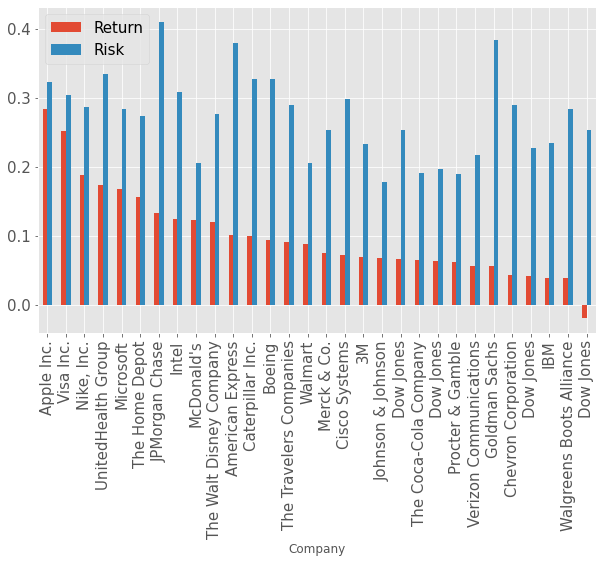

In [45]:
#Sorting by Return

summary2.sort_values(by = "Return", ascending = False).plot(kind = "bar", figsize = (10, 6), 
                                                            fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

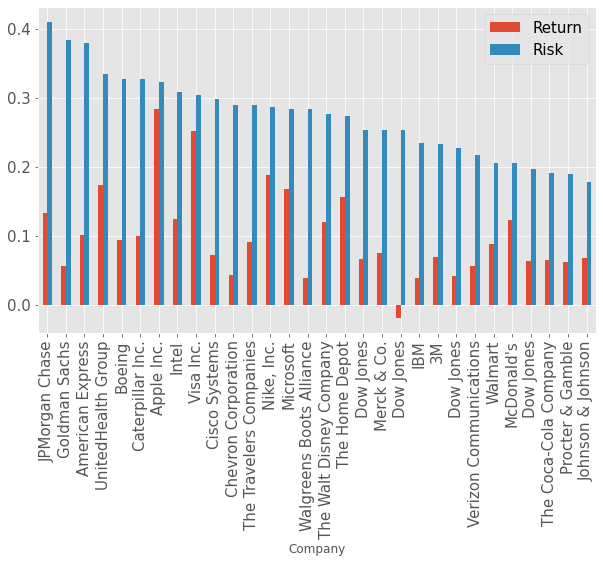

In [46]:
#Sorting by Risk 

summary2.sort_values(by = "Risk", ascending = False).plot(kind = "bar", figsize = (10,6), 
                                                          fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
summary2.set_index("Symbol", inplace = True)

### Correlations

In [ ]:
corr_matrix = ret.corr()
corr_matrix.iloc[:5,:5]

,AAPL,AXP,BA,CAT,CSCO
AAPL,1.000000,0.480043,0.438086,0.487226,0.525349
AXP,0.480043,1.000000,0.550139,0.595983,0.552228
BA,0.438086,0.550139,1.000000,0.553999,0.485747
CAT,0.487226,0.595983,0.553999,1.000000,0.568403
CSCO,0.525349,0.552228,0.485747,0.568403,1.000000


In [ ]:
import seaborn as sns

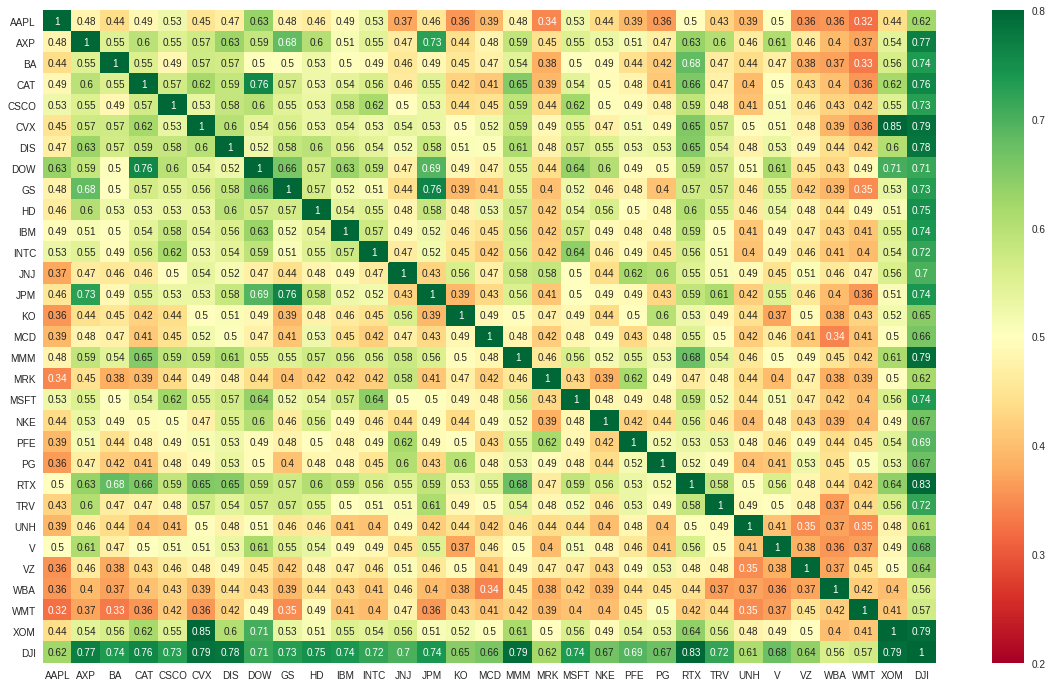

In [ ]:
plt.figure(figsize = (20, 12))
sns.heatmap(corr_matrix, cmap='RdYlGn',annot=True, vmin = 0.2, vmax = 0.8)
plt.show()

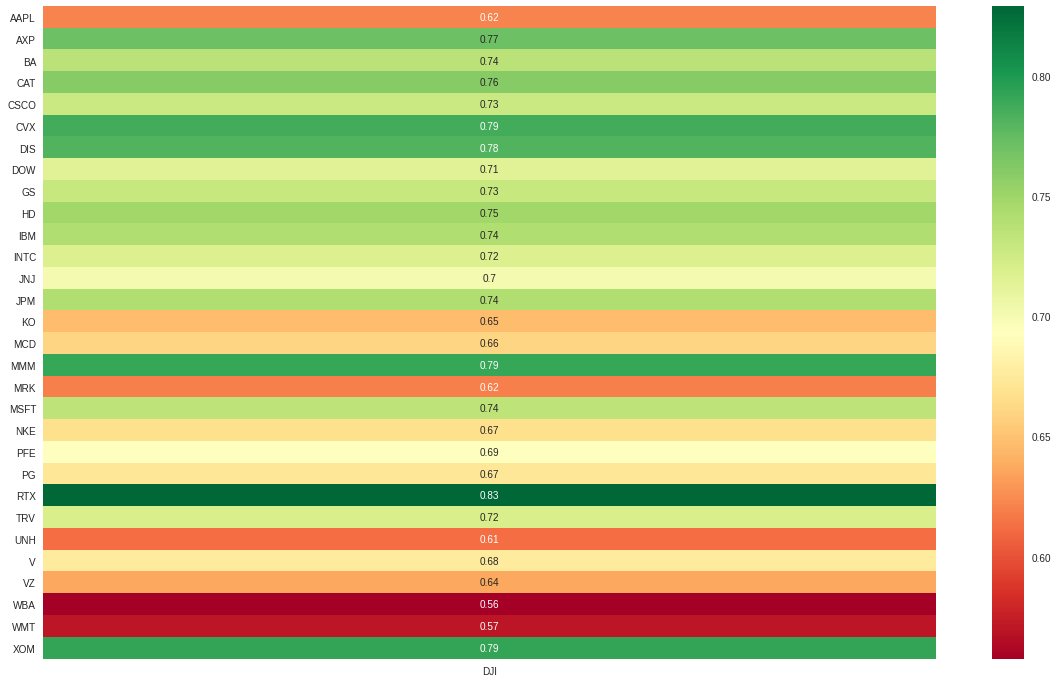

In [ ]:
plt.figure(figsize = (20, 12))
s = pd.DataFrame(corr_matrix['DJI']).drop('DJI')
sns.heatmap(s, cmap='RdYlGn',annot=True, vmin = s.min(), vmax = s.max())
plt.show()

## Index Tracking - an Introduction

Plan: Track the DJI with only __10 Stocks__ (Tracking Portfolio).

Criteria to select Tracking Portfolio: Those 10 Stocks with the __lowest individual Tracking Error__ (TE) in the Training/Fitting Period.

- Training/Fitting Period: 2017 & 2018
- (Forward) Testing Period: 2019

Once we have identified the 10 Tracking Stocks we need to find their __optimal weights__ in the Tracking Portfolio that __minimize TE__.

In [53]:
df2 = df.loc["2017":"2018"].copy()

In [54]:
norm2 = df2.div(df2.iloc[0]).mul(100)

In [55]:
ret2 = ret.loc["2017":"2018"].copy()

In [56]:
ret_diff = ret2.sub(ret2.DJI, axis = 0) #how close a stocks returns were to those of dji 
ret_diff.head(3)

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,-0.003180,0.011114,0.002257,0.007449,0.004559,-0.004755,0.011817,NaN,0.002824,-0.004314,...,-0.004602,0.005009,-0.018446,0.002781,0.012940,0.016451,-0.003613,-0.012685,0.000950,0.0
2017-01-04,-0.004157,0.009039,0.007474,-0.007507,-0.017445,-0.003293,0.009783,NaN,0.003420,0.005822,...,0.000525,-0.002406,-0.008414,-0.000189,0.005138,-0.004137,-0.002797,0.002788,-0.014040,0.0
2017-01-05,0.007235,-0.010177,0.002717,-0.003942,0.004475,-0.002179,0.001591,NaN,-0.005295,-0.009658,...,0.008777,0.006207,-0.013817,0.003817,0.013878,0.004351,0.002752,0.004322,-0.012757,0.0


## Selecting the Tracking Stocks

In [59]:
def tracking_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Premium"] = summary["mean"] * 252
    summary["TE"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [60]:
tracking = tracking_ann(ret_diff)
tracking.head()

,Premium,TE
AAPL,0.091152,0.183767
AXP,0.053010,0.132638
BA,0.306013,0.182054
CAT,0.103005,0.196256
CSCO,0.112351,0.151141


In [ ]:
tracking.sort_values(by = "TE").head()

,Premium,TE
DJI,0.000000,0.000000
MMM,-0.041338,0.124822
JPM,-0.011811,0.131067
PFE,0.069015,0.131856
V,0.191612,0.131870


In [61]:
# DJI and Top Ten closest stocks (lowest TE)

noa = 10
tracking_stocks = tracking.sort_values(by = "TE").index[:noa+1]

In [ ]:
tracking_stocks

Index(['DJI', 'MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM',
       'TRV'],
      dtype='object')

In [62]:
norm_track = norm2.loc[:, tracking_stocks]

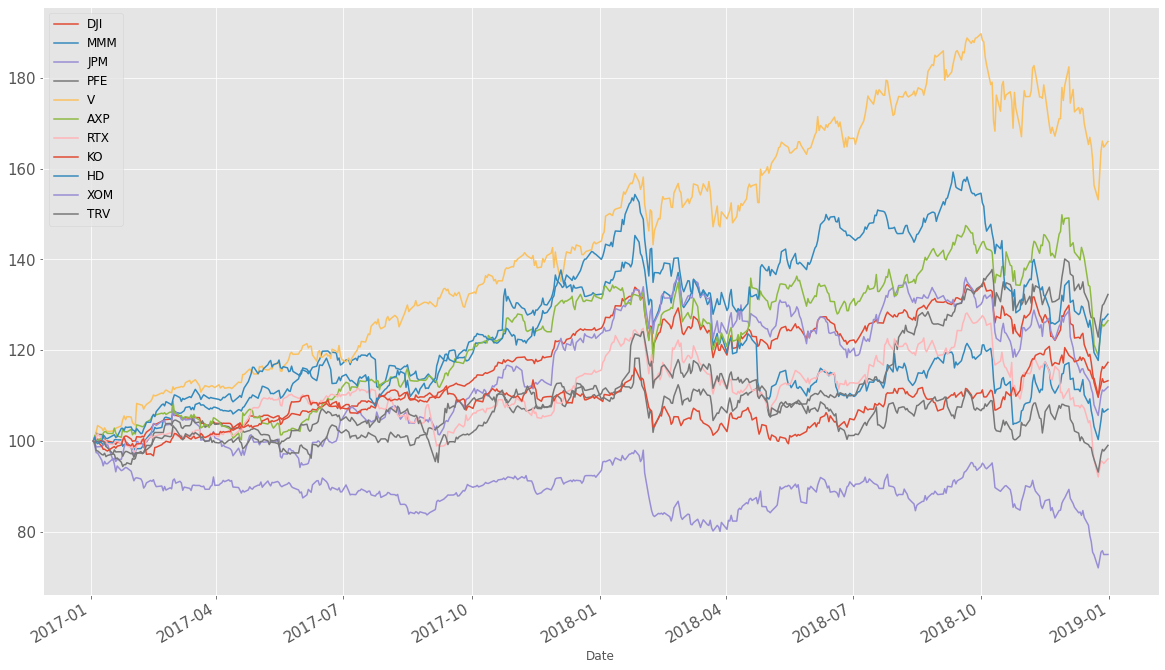

In [63]:
norm_track.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

In [64]:
tracking_stocks = tracking_stocks[1:] #all but dji

## Index Tracking - A simple Tracking Portfolio

In [ ]:
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

In [65]:
#Equal weights (starting point of optimization)

eweights = np.full(noa, 1/noa)
eweights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [66]:
#Calculate portfolio returns (MMM return * (1/10) + JPM return * (1/10) ... for each day)

def port_ret(weights):
    return ret2.loc[:, tracking_stocks].dot(weights)

In [76]:
#Define function to be minimized -> want to minimize tracking error of portfolio

def tracking_error(weights): 
     return port_ret(weights).sub(ret2.DJI).std() * np.sqrt(252)

In [79]:
tracking_error(eweights)

0.04120933686266803

In [67]:
#Normalized redturns of Simple Portfolio

ew_port = port_ret(eweights)[1:].add(1).cumprod().mul(100)
ew_port

Date
2017-01-04    100.164136
2017-01-05     99.765133
2017-01-06     99.981424
2017-01-09     99.546547
2017-01-10     99.482801
                 ...    
2018-12-24    108.298000
2018-12-26    113.228018
2018-12-27    114.505929
2018-12-28    114.005345
2018-12-31    114.963346
Length: 501, dtype: float64

In [68]:
norm_track["EW_Port"] = ew_port
norm_track.iloc[0, -1] = 100

In [69]:
norm_track.head()

,DJI,MMM,JPM,PFE,V,AXP,RTX,KO,HD,XOM,TRV,EW_Port
Date,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.151645,99.633154,100.878791,100.817612,101.207702,100.063159,99.641154,100.886012,98.899769,99.462364,100.164136
2017-01-05,100.088168,99.809044,98.716035,101.848487,101.999995,99.960187,100.469184,99.880385,99.694733,97.425463,97.874277,99.765133
2017-01-06,100.412645,100.101091,98.727501,101.454544,103.408804,100.159260,101.551928,99.856465,99.419255,97.370448,97.824644,99.981424
2017-01-09,100.028273,99.561922,98.796282,101.424246,102.830189,100.676844,100.604537,98.851676,100.000000,95.764112,97.038874,99.546547


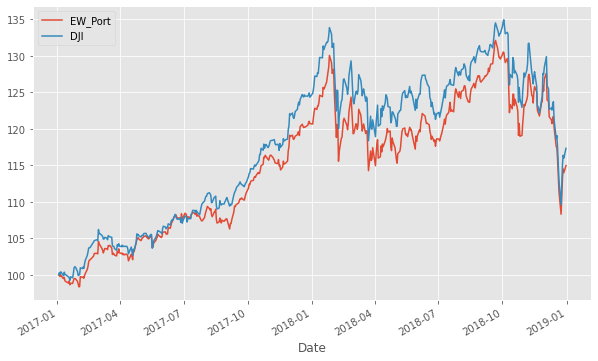

In [71]:
norm_track[["EW_Port", "DJI"]].plot(figsize = (10,6))
plt.legend(loc = 2)
plt.show()

## Find the Optimized Weights

In [72]:
import scipy.optimize as sco 

In [73]:
#Constraint: weights must sum up to 1 <-> sum of weights - 1 = 0

cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})
cons

{'type': 'eq', 'fun': <function __main__.<lambda>(x)>}

In [74]:
#Bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0,1) for x in range(noa))
bnds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [78]:
#Run optimization based on function to be minimized, starting with equal 
# weights and based on respective bounds and constraints

opts = sco.minimize(tracking_error, eweights, method = "SLSQP", bounds = bnds, constraints= cons)

In [80]:
#output of optimization
opts

     fun: 0.03796156173824401
     jac: array([0.00744084, 0.00756334, 0.0074499 , 0.0074106 , 0.00737157,
       0.00733688, 0.00725428, 0.00753916, 0.00737198, 0.00768488])
 message: 'Optimization terminated successfully'
    nfev: 77
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.13101952, 0.14451522, 0.05984737, 0.16765083, 0.04028627,
       0.10054676, 0.07688202, 0.10956915, 0.11460304, 0.05507981])

In [81]:
#Getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.13101952, 0.14451522, 0.05984737, 0.16765083, 0.04028627,
       0.10054676, 0.07688202, 0.10956915, 0.11460304, 0.05507981])

In [82]:
pd.Series(index = tracking_stocks, data = optimal_weights)

MMM    0.131020
JPM    0.144515
PFE    0.059847
V      0.167651
AXP    0.040286
RTX    0.100547
KO     0.076882
HD     0.109569
XOM    0.114603
TRV    0.055080
dtype: float64

In [83]:
#Normalized Returns

opt_port = port_ret(optimal_weights)[1:].add(1).cumprod().mul(100)
opt_port

Date
2017-01-04    100.125313
2017-01-05     99.822671
2017-01-06    100.145521
2017-01-09     99.669085
2017-01-10     99.526402
                 ...    
2018-12-24    109.460454
2018-12-26    114.706689
2018-12-27    116.037462
2018-12-28    115.455022
2018-12-31    116.345589
Length: 501, dtype: float64

In [84]:
norm_track["Opt_Port"] = opt_port
norm_track.iloc[0, -1] = 100

In [85]:
norm_track.head(2)

,DJI,MMM,JPM,PFE,V,AXP,RTX,KO,HD,XOM,TRV,EW_Port,Opt_Port
Date,,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.151645,99.633154,100.878791,100.817612,101.207702,100.063159,99.641154,100.886012,98.899769,99.462364,100.164136,100.125313


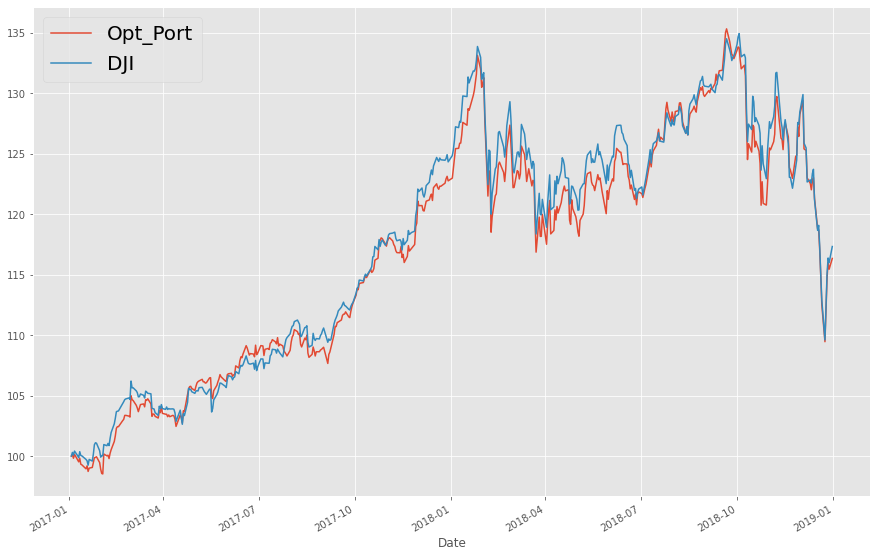

In [86]:
norm_track[["Opt_Port", "DJI"]].plot(figsize = (15, 10))
plt.legend(fontsize = 20, loc = 2)
plt.show()

In [87]:
summary_ann(norm_track[["Opt_Port", "EW_Port", "DJI"]].pct_change())

,Return,Risk
Opt_Port,0.084879,0.131867
EW_Port,0.078256,0.127138
DJI,0.089562,0.135206


## Forward Testing (Part 1)

In [ ]:
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

In [89]:
#Generalized Tracking Error

def tracking_error_gen(data, tracking_stocks, weights, index, start, end):
    return data.loc[start:end, tracking_stocks].dot(weights).sub(ret.loc[start:end, index]).std() * np.sqrt(252)   

In [90]:
#Visualizations

def visual(data, tracking_stocks, weights, index, start, end):
    track = data.loc[start:end, tracking_stocks].dot(weights).add(1).cumprod().mul(100)
    track.name = "Portfolio"
    index = data.loc[start:end, index].add(1).cumprod().mul(100)
    plt.figure(figsize = (12,8))
    track.plot()
    index.plot()
    plt.legend(fontsize = 20, loc = 2)
    plt.show()

In [91]:
tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", "2017-01-01", "2018-12-31")

0.03796156173824401

In [93]:
#Forward test

forward_te = tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", 
                                "2019-01-01", "2019-12-31")
forward_te

0.047843032216401155

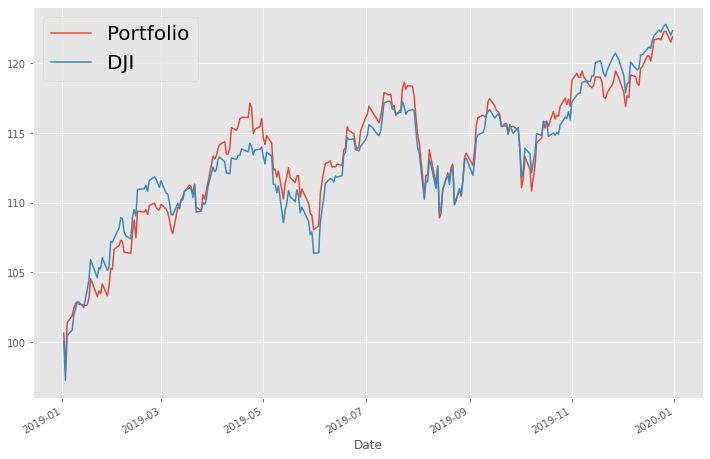

In [94]:
visual(ret, tracking_stocks, optimal_weights, "DJI", "2019-01-01", "2019-12-31")

## Forward Testing (Part 2)

Want to see if optimal weights outperform random weights on random stocks

In [99]:
bucket = df.columns.drop(["DOW", "DJI"])
bucket

Index(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM',
       'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE',
       'PG', 'RTX', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT', 'XOM'],
      dtype='object')

In [100]:
#Random Stocks and Random Weights

np.random.seed(123)
random_stocks = np.random.choice(bucket, size = noa, replace = False)
random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()

In [101]:
print(random_stocks, random_weights)

['GS' 'XOM' 'CVX' 'VZ' 'HD' 'WBA' 'JPM' 'RTX' 'JNJ' 'TRV'] [0.0858475  0.05974735 0.098733   0.14853474 0.07177554 0.08370995
 0.13136476 0.07500036 0.04705319 0.19823361]


In [102]:
tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")

0.055536608820316906

In [ ]:
forward_te

0.04784303228763595

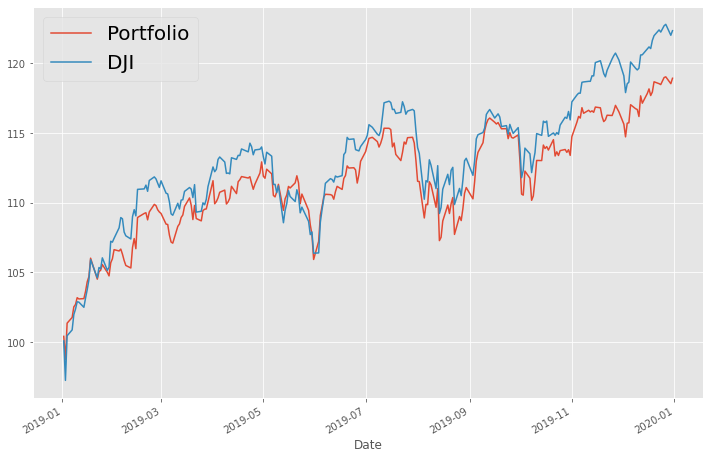

In [103]:
visual(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")

Repeating this process 10000 times to see how often optimal weights outperform random

In [105]:
tes = np.empty(10000)
np.random.seed(123)
for i in range(10000):
    random_numbers = np.random.random(noa)
    random_weights = random_numbers / random_numbers.sum()
    random_stocks = np.random.choice(bucket, size = noa, replace = False)
       
    tes[i] = tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")

In [107]:
(tes < forward_te).mean() # 6.55 percent of the time random is better (0 + 0 + 1 + 0 ) / 4 = 1/ 4 -> one out of every four times -> 25%

0.0655

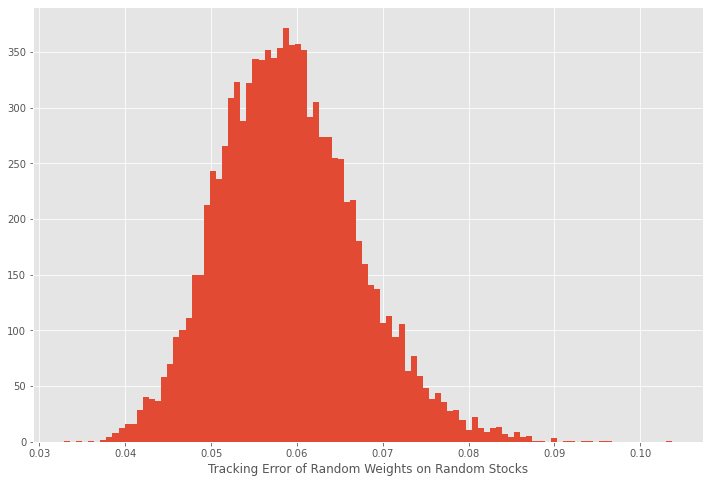

In [108]:
plt.figure(figsize = (12, 8))
plt.hist(tes, bins = 100)
plt.xlabel("Tracking Error of Random Weights on Random Stocks")
plt.show()